In [24]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [25]:
from amstools import *

In [26]:
from tensorpotential.calculator import grace_fm, TPCalculator

In [27]:
from amstools.thermodynamics import run_convex_hull_calculation, plot_convex_hull

In [28]:
from amstools.sources import fetch_structures, fetch_mp_reference_df

In [29]:
from ase.build import bulk

In [30]:
from pyace.asecalc import PyGRACEFSCalculator

In [45]:
calc=TPCalculator("seed/1/saved_model/")

In [46]:
cache_dir='../../1-AlLi-GRACE-2LAYER/0-data/AlLi_Materials_Project'

In [47]:
ref_df=fetch_mp_reference_df(['Al','Li'], 
                             # mp_api_key='XXXXX',  ## get from https://next-gen.materialsproject.org/api                         
                             max_atoms=32,
                             cache_dir=cache_dir)

In [48]:
ref_df

,name,ase_atoms,e_per_atom,e_formation_per_atom,e_chull_dist_per_atom
0,Al__mp-1183144,"(Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('A...",NaN,0.010481,0.010481
1,Al__mp-2647008,"(Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('A...",NaN,0.032078,0.032078
2,Al__mp-134,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",NaN,0.000000,0.000000
3,Li__mp-567337,"(Atom('Li', [-0.9218888897176146, 2.8025429460...",NaN,0.008819,0.008819
4,Li__mp-10173,"(Atom('Li', [-1.1807313597921131e-06, 1.740594...",NaN,0.005988,0.005988
5,Li__mp-51,"(Atom('Li', [0.0, 0.0, 0.0], index=0))",NaN,0.001672,0.001672
6,Li__mp-976411,"(Atom('Li', [0.0, 0.0, 1.0216207669999998e-05]...",NaN,0.005889,0.005889
7,Li__mp-1103107,"(Atom('Li', [1.379696372079909, 3.982485883382...",NaN,0.055379,0.055379
8,Li__mp-1063005,"(Atom('Li', [0.0, 0.0, 0.0], index=0), Atom('L...",NaN,0.015671,0.015671
9,Li__mp-1018134,"(Atom('Li', [4.618009551014942, 2.666207852974...",NaN,0.000000,0.000000


In [49]:
struct_dict=fetch_structures(['Al','Li'], 
                             # mp_api_key=MP_API_KEY, 
                             max_atoms=32,
                             cache_dir=cache_dir)

In [50]:
pipeline_dict={}

In [51]:
df, pipeline_dict=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc, pipeline_dict=pipeline_dict)

2026-02-25 23:00:56,683 - root - INFO - Processing structure 'Al__mp-1183144'
2026-02-25 23:00:56,685 - root - INFO - =======================
2026-02-25 23:00:56,687 - root - INFO - Step: optimization
Processing: optimized_structure (4 atom(s)): 100%|██████████████████████████████████████████████████████████████████████| 1/1 [00:07<00:00,  7.71s/it]
2026-02-25 23:01:04,403 - root - INFO - Step status: finished
2026-02-25 23:01:04,404 - root - INFO - =======================
2026-02-25 23:01:04,406 - root - INFO - =======================
2026-02-25 23:01:04,407 - root - INFO - Step: murnaghan
Processing: strain_1_1 (4 atom(s)): 100%|████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 110.40it/s]
2026-02-25 23:01:04,515 - root - INFO - Job is done
2026-02-25 23:01:04,516 - root - INFO - Step status: finished
2026-02-25 23:01:04,516 - root - INFO - =======================
2026-02-25 23:01:04,517 - root - INFO - Processing structure 'Al__mp-2647

Structure dataset: multiple unique compositions found, trying to construct convex hull


In [52]:
df

,name,ase_atoms,energy,energy_per_atom,equilibrium_volume,equilibrium_bulk_modulus,comp_dict,NUMBER_OF_ATOMS,comp_tuple,n_Al,c_Al,n_Li,c_Li,e_formation_per_atom,e_chull_dist_per_atom
0,Al__mp-1183144,"(Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('A...",-15.028423,-3.757106,68.436129,128.968271,{'Al': 4},4,"((Al, 1.0),)",4,1.000000,0,0.000000,0.006968,6.967774e-03
1,Al__mp-2647008,"(Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('A...",-7.493723,-3.746861,34.074240,88.337574,{'Al': 2},2,"((Al, 1.0),)",2,1.000000,0,0.000000,0.017212,1.721208e-02
2,Al__mp-134,"(Atom('Al', [0.0, 0.0, 0.0], index=0))",-3.764074,-3.764074,16.498625,103.284117,{'Al': 1},1,"((Al, 1.0),)",1,1.000000,0,0.000000,0.000000,0.000000e+00
3,Li__mp-567337,"(Atom('Li', [-1.1214555842177647, 2.8012629215...",-15.327117,-1.915890,161.531973,23.138630,{'Li': 8},8,"((Li, 1.0),)",0,0.000000,8,1.000000,0.000456,4.558570e-04
4,Li__mp-10173,"(Atom('Li', [-5.68450084151293e-07, 1.79066270...",-3.832293,-1.916147,41.509682,14.215626,{'Li': 2},2,"((Li, 1.0),)",0,0.000000,2,1.000000,0.000199,1.987962e-04
5,Li__mp-51,"(Atom('Li', [0.0, 0.0, 0.0], index=0))",-1.910078,-1.910078,19.178922,21.063074,{'Li': 1},1,"((Li, 1.0),)",0,0.000000,1,1.000000,0.006268,6.267864e-03
6,Li__mp-976411,"(Atom('Li', [1.8609307441251182e-21, 3.7042004...",-7.654318,-1.913579,78.926616,8.834369,{'Li': 4},4,"((Li, 1.0),)",0,0.000000,4,1.000000,0.002766,2.766156e-03
7,Li__mp-1103107,"(Atom('Li', [1.3873460456556381, 4.02838504921...",-22.685567,-1.890464,240.322769,26.064856,{'Li': 12},12,"((Li, 1.0),)",0,0.000000,12,1.000000,0.025882,2.588159e-02
8,Li__mp-1063005,"(Atom('Li', [0.0, 0.0, 0.0], index=0), Atom('L...",-5.747493,-1.915831,60.571787,37.776753,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000,0.000514,5.144257e-04
9,Li__mp-1018134,"(Atom('Li', [4.626303213990428, 2.670994470452...",-5.745011,-1.915004,60.563617,11.341082,{'Li': 3},3,"((Li, 1.0),)",0,0.000000,3,1.000000,0.001342,1.341966e-03


In [20]:
calc_ft=TPCalculator("../3a-finetuning/seed/1/final_model/")

In [21]:
pipeline_dict_ft = {}

In [22]:
df_ft, pipeline_dict_fm=run_convex_hull_calculation(structure_dict=struct_dict, calc=calc_ft, pipeline_dict=pipeline_dict_ft)

2026-02-23 17:56:22,968 - root - INFO - Processing structure 'Al__mp-1183144'
2026-02-23 17:56:22,969 - root - INFO - =======================
2026-02-23 17:56:22,970 - root - INFO - Step: optimization
Processing: optimized_structure (4 atom(s)): 100%|██████████████████████████████████████████████████████████████████████| 1/1 [00:06<00:00,  6.13s/it]
2026-02-23 17:56:29,109 - root - INFO - Step status: finished
2026-02-23 17:56:29,110 - root - INFO - =======================
2026-02-23 17:56:29,111 - root - INFO - =======================
2026-02-23 17:56:29,112 - root - INFO - Step: murnaghan
Processing: strain_1_1 (4 atom(s)): 100%|█████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 82.94it/s]
2026-02-23 17:56:29,251 - root - INFO - Job is done
2026-02-23 17:56:29,252 - root - INFO - Step status: finished
2026-02-23 17:56:29,253 - root - INFO - =======================
2026-02-23 17:56:29,253 - root - INFO - Processing structure 'Al__mp-2647

Structure dataset: multiple unique compositions found, trying to construct convex hull


{('Al',
  'Li'): <Axes: title={'center': 'Convex Hull: Al-Li'}, xlabel='Concentration of Li', ylabel='Formation energy (eV/atom)'>}

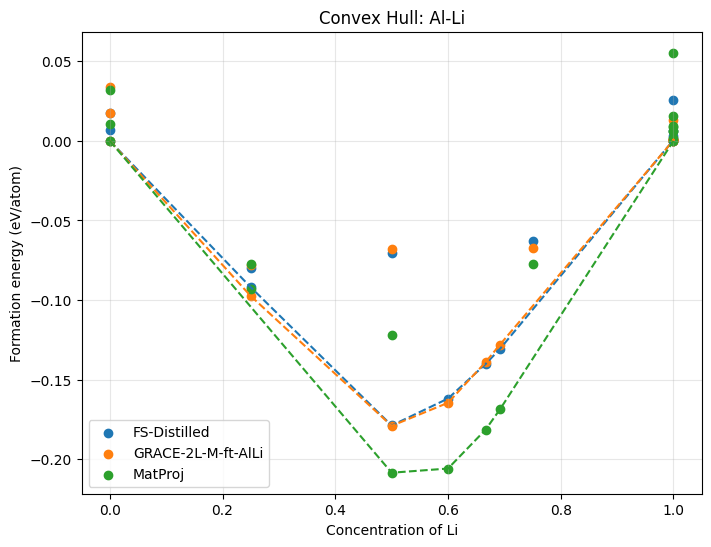

In [53]:
plot_convex_hull({
    "FS-Distilled":df,
    "GRACE-2L-M-ft-AlLi":df_ft, 
      "MatProj":ref_df
})

{('Al',
  'Li'): <Axes: title={'center': 'Convex Hull: Al-Li'}, xlabel='Concentration of Li', ylabel='Formation energy (eV/atom)'>}

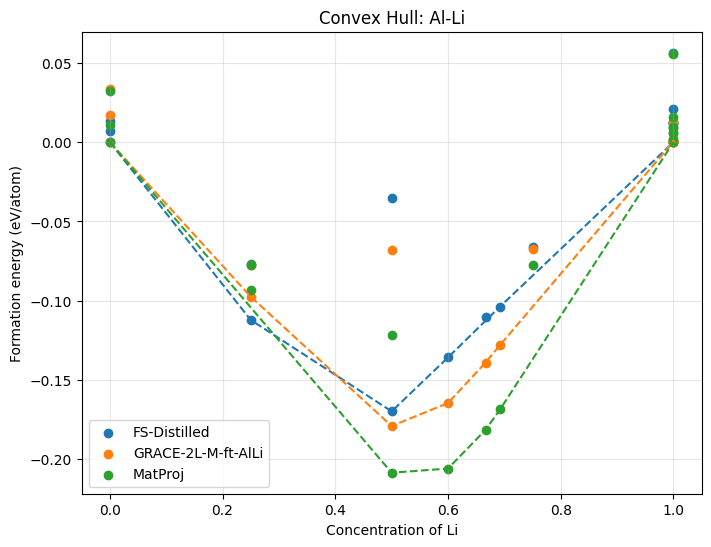

In [42]:
plot_convex_hull({
    "FS-Distilled":df,
    "GRACE-2L-M-ft-AlLi":df_ft, 
      "MatProj":ref_df
})